In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

2022-01-30 17:55:21.194129: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-30 17:55:21.194337: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-30 17:55:21.195202: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Accuracy without normalization: __ %
# Accuracy with normalization:    __ %

#train_images = tf.keras.utils.normalize(train_images, axis=1)
#test_images = tf.keras.utils.normalize(train_images, axis=1)

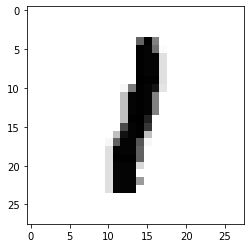

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train_images[231], cmap=plt.cm.binary)
plt.show()

In [11]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels) # sparse_
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

2022-01-30 17:55:31.326861: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-30 17:55:31.352316: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2699905000 Hz


Epoch 1/5
938/938 [==============================] - 35s 36ms/step - loss: 0.3868 - accuracy: 0.8784
Epoch 2/5
938/938 [==============================] - 65s 70ms/step - loss: 0.0519 - accuracy: 0.9831
Epoch 3/5
938/938 [==============================] - 72s 76ms/step - loss: 0.0334 - accuracy: 0.9893
Epoch 4/5
938/938 [==============================] - 68s 73ms/step - loss: 0.0245 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0187 - accuracy: 0.9945


In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.0308 - accuracy: 0.9921


[0.03080509975552559, 0.9921000003814697]

In [13]:
model.save('mnist_model')

2022-01-30 18:01:27.784881: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: mnist_model/assets


In [14]:
new_model = tf.keras.models.load_model('mnist_model')

In [16]:
new_model.predict([test_images])

array([[1.8419561e-12, 8.0685889e-11, 2.9343594e-10, ..., 1.0000000e+00,
        4.2470545e-12, 5.4382679e-11],
       [8.3006130e-11, 1.9758393e-09, 1.0000000e+00, ..., 1.9622661e-13,
        2.9262756e-15, 1.7808907e-16],
       [8.3372007e-12, 9.9999845e-01, 1.6883340e-09, ..., 6.7644713e-08,
        1.2248893e-08, 3.8762176e-09],
       ...,
       [1.4717298e-19, 4.8295944e-11, 8.7056440e-14, ..., 1.5281111e-11,
        2.1073199e-11, 9.2078266e-13],
       [1.3124876e-11, 7.2121146e-12, 3.4092917e-15, ..., 1.1805243e-13,
        7.8116318e-07, 4.6454576e-11],
       [1.9810874e-10, 5.1788370e-12, 1.3167946e-10, ..., 5.6141132e-17,
        7.6681595e-12, 2.2054704e-12]], dtype=float32)

In [17]:
import numpy as np
print(np.argmax(predictions[0]))

7


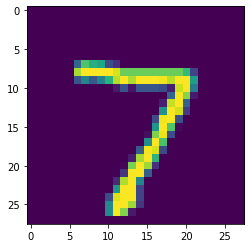

In [19]:
plt.imshow(test_images[0])
plt.show()